In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math 
from scipy.stats import norm

In [2]:
#initial Values

iter = 2000
bandit_mean = [1, 2, 3]

In [3]:
class Casino:
    def __init__(self,true_mean) :
        self.true_mean = true_mean
        self.predicted_mean = 0
        self.lambda_ = 1 
        self.sum_x = 0
        self.tau = 1
        self.N = 0


    def pull(self):
        return np.random.randn() / np.sqrt(self.tau) + self.true_mean
    
    def sample(self):
        return np.random.randn() / np.sqrt(self.lambda_) + self.predicted_mean

    def update(self,x):
        self.N += 1
        self.lambda_ += self.tau
        self.sum_x += x
        self.predicted_mean = self.tau*self.sum_x / self.lambda_

In [4]:
def plot(casinos,iter):
    x = np.linspace(-3,6,200)
    for b in casinos:
        y = norm.pdf(x,b.predicted_mean,np.sqrt(1/b.lambda_))
        plt.plot(x,y,label=f"real mean : {b.true_mean:.4f},nu plaus : {b.N}")
    plt.title(f"Bandit distributions after {iter} trails")
    plt.legend()
    plt.show()
        

In [5]:
def experiment():
    casinos = [Casino(p) for p in bandit_mean]

    sample_points = [5,10,20,100,200,500,1000,1500,1999]
    rewards = np.zeros(iter)

    for i in range(iter):


        j = np.argmax([b.sample() for b in casinos])

        if i in sample_points:
            plot(casinos,i)

        x = casinos[j].pull()

        rewards[i] = x
        casinos[j].update(x)

        

    print("total rewards :", rewards.sum())


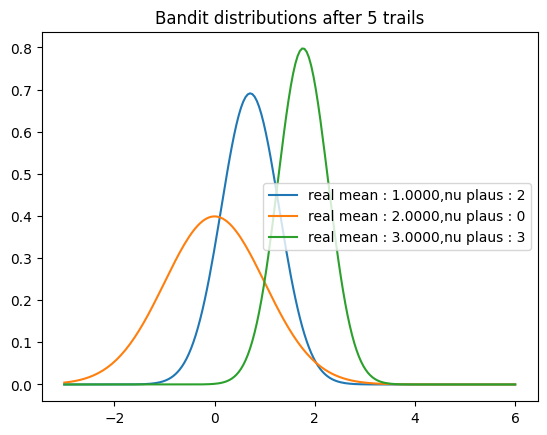

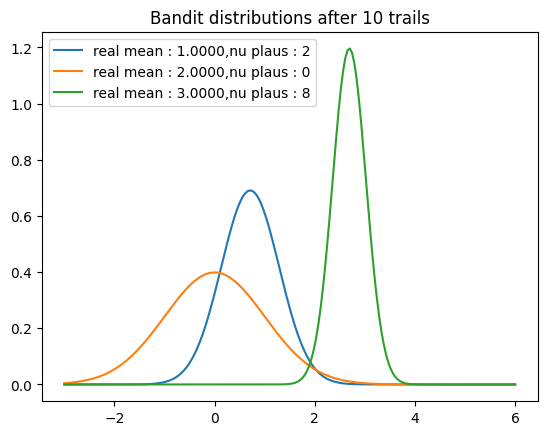

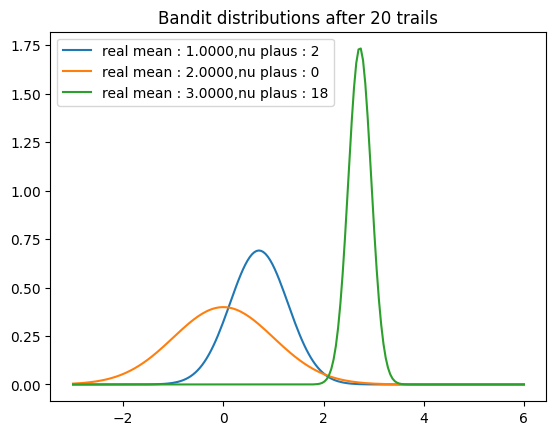

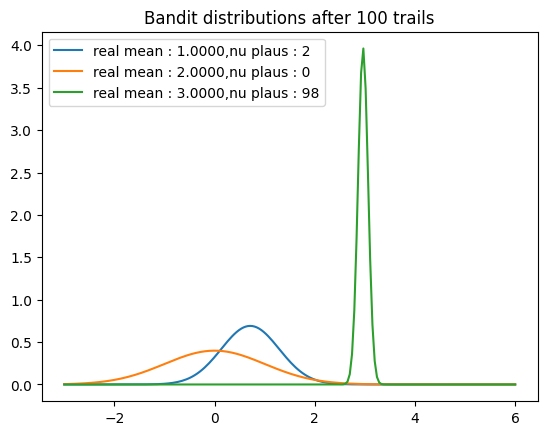

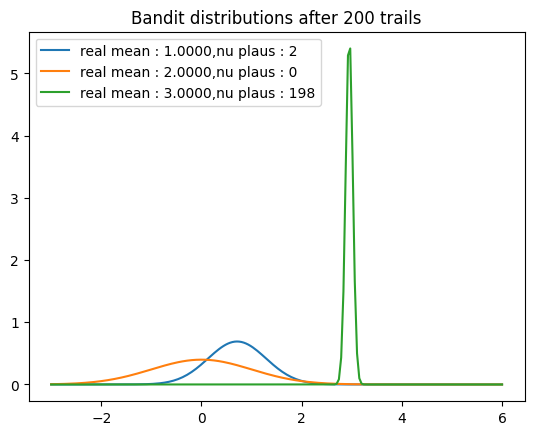

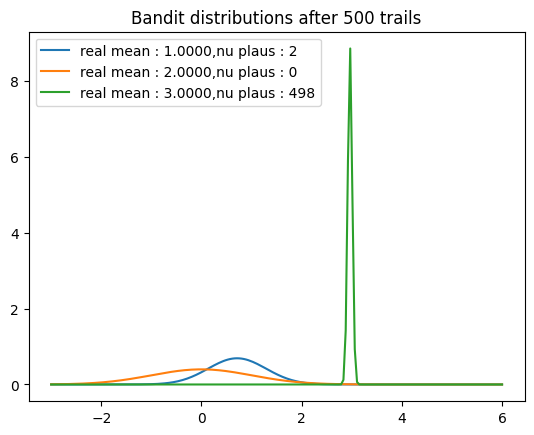

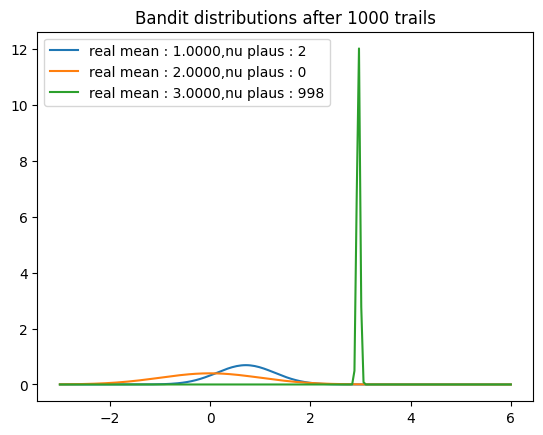

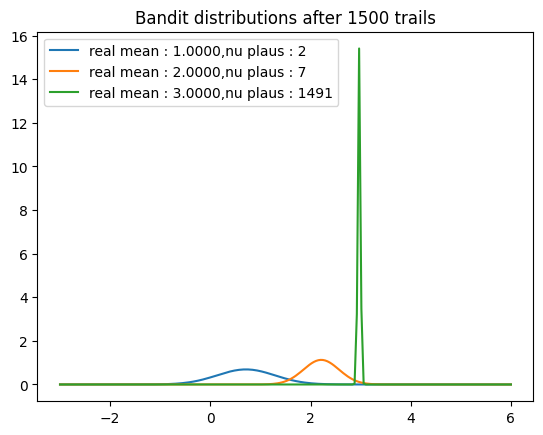

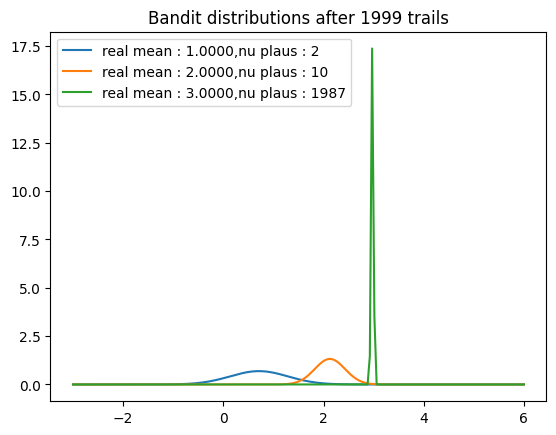

total rewards : 5940.867629857155


In [6]:

if __name__ == "__main__":
    experiment()
